# Explore and re - Model

### Import Required Libraries

In [105]:
import pandas as pd
import numpy as np
np.random.seed(0)

import os
import glob
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import importlib

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [177]:
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

### Load Data

In [106]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from pickle file
# The protocol version used is detected automatically, so we do not
# have to specify it.
with open('data/df-os.pickle', 'rb') as f:
    df_2 = pickle.load(f)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


> __To proceed__:
* Visualize data
* To scale or not to scale
* Build a Decision Tree classifier, to set a modeling baseline
* Examine the relative importance of dataset features
* Test, tune, and score ensemble method models against the dataset
* Select best features for final modeling

### Plot Class Counts

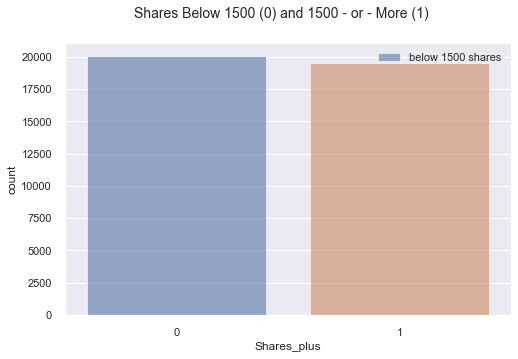

In [107]:
# styling the figure
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

# titling and labeling
plt.suptitle("Shares Below 1500 (0) and 1500 - or - More (1)", fontsize=14)
plt.ylabel("count")

#plotting
ax = sns.countplot(x="Shares_plus",alpha=.6, data=df_2);

# adding legend
plt.legend(labels=('below 1500 shares', '1500 and above'))
plt.show()

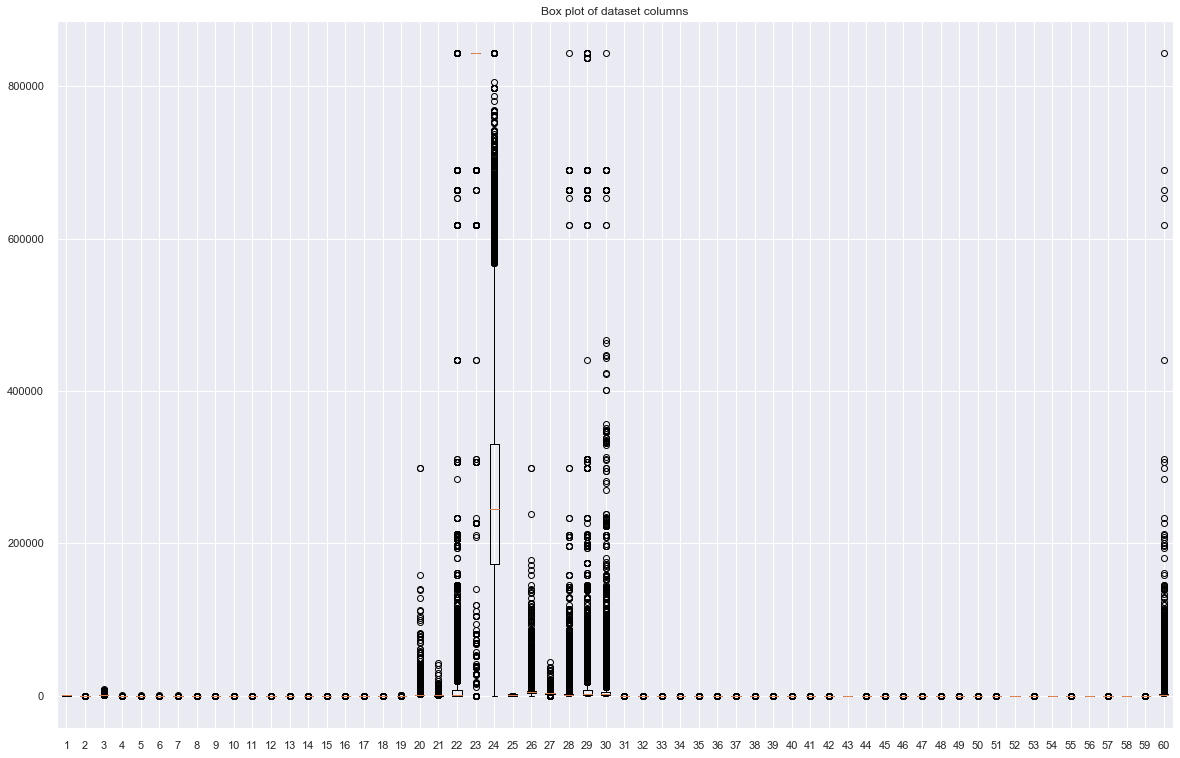

In [108]:
# Create a box plot of each column
plt.figure(figsize=(20, 13))
plt.boxplot([df_2[col] for col in df_2.iloc[:, 0:60].columns])

plt.title("Box plot of dataset columns")
#plt.xticks(range(len(df_2.columns.values)), df_2.columns.values)
plt.show()


> We see a significant range in scale for data in this set; however, scaling is not required for Decision Tree models, which is what we will be using to set a modeling baseline.

## Manual Tuning
* ## Build a Base Model
## =========================================

We will start by building a simple decision tree.

#### Split Predictor Variables and Target

In [110]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_plus'], axis=1) # features
y = df_2['Shares_plus'] # target

# splitting the dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0
                                                   )

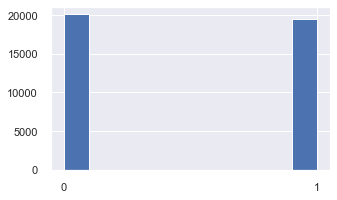

In [111]:
# viewing class countsa
plt.figure(figsize=(5, 3))
plt.show(plt.hist(y))

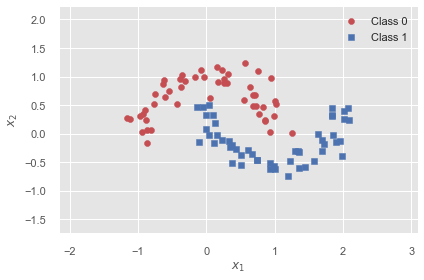

In [171]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Unfit Model

#### ROC - AUC
> Let's plot the receiver operating characteristic (ROC) probability curve and the area underneath the curve (AUC) representing the degree of separability for target classes in an unfitted Logistic Regression model.

In [112]:
from yellowbrick.classifier import roc_auc

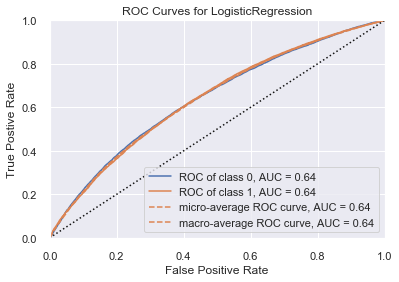

In [113]:
visualizer = roc_auc(LogisticRegression(), X, y)

> Near perfect predictions would display the curves elbow in the top - left corner of the plot. Our predictive capability is far from perfect, but it does give us an edge in our ability to determine, in advance, characteristics for an article to perform above the 50th - percentile for article shares (1400) and above our target (1500).

## Buid a Decision Tree

In [114]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=5, 
                                  random_state = 0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Feature Importance

Determine which features impact most significantly the outcome, for our Decision Tree model.

In [115]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

#### Plot Feature Importances

Let's get a more useful view, by displaying feature importances with column names on a horizontal bar plot.

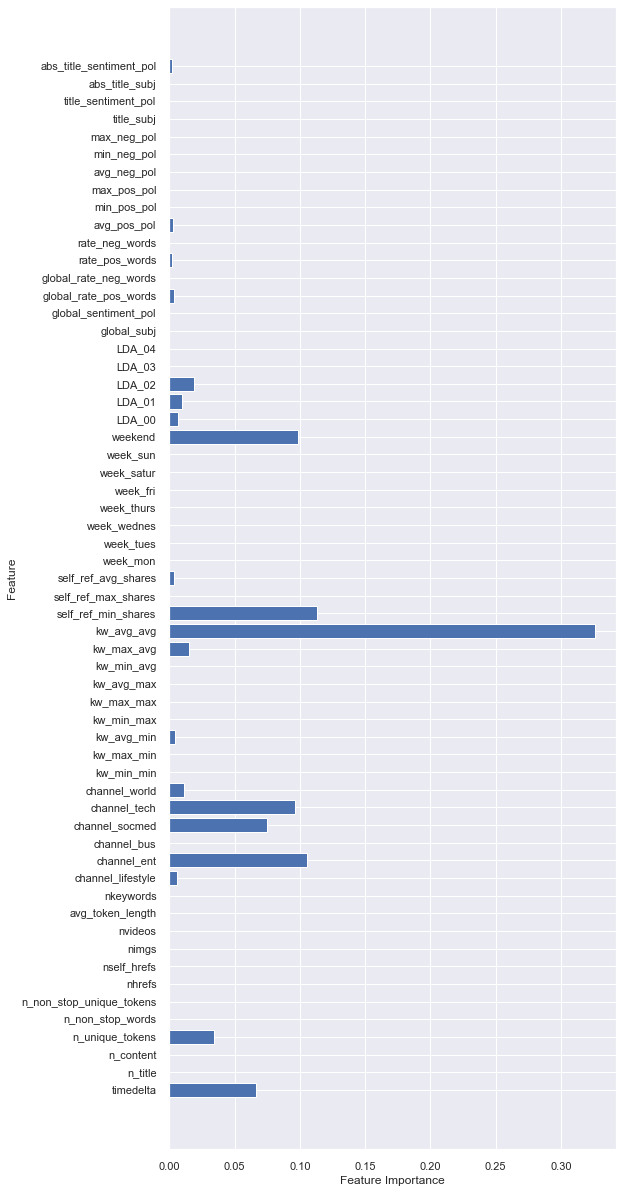

In [116]:
# visualize feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.barh(range(n_features), 
             model.feature_importances_, 
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

> Most of the features do not seem to male a whole lot of difference.
* The plot suggests 7 - to - 10 at least moderately important features, among more than 50 in the dataset.
* Let's check scores for our full - featured tree model and do a couple of comparisons, before reducing the number of predictors.

#### Model Performance

Along with an scikit-learn classification report, we will view a matrix and heatmap reflecting outcomes for our model, in the following format:

<table>
  <tr>
    <td>True Negative</td>
    <td>False Positive</td>
  </tr>
  <tr>
    <td>False Negative</td>
    <td>True Positive</td>
  </tr>
</table>

In [117]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



> Scores appear consistent accross the board, for this model, with precision, recall, and f1-scores all between 0.62 and 0.64, inclusive.

In [118]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
# TP = np.sum(np.logical_and(pred_labels == 1, true_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
# TN = np.sum(np.logical_and(pred_labels == 0, true_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
# FP = np.sum(np.logical_and(pred_labels == 1, true_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
# FN = np.sum(np.logical_and(pred_labels == 0, true_labels == 1))
 
# print 'TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN)

#### Confusion Matrix Heatmap

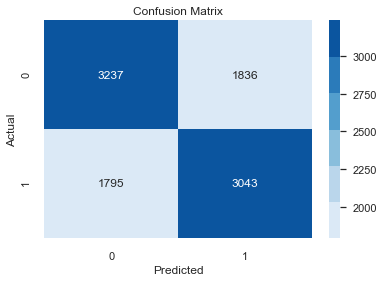

In [119]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('Blues'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

<table>
  <tr>
    <td>True Negative: </td>
    <td>False Positive: </td>
  </tr>
  <tr>
    <td>False Negative: </td>
    <td>True Positive: </td>
  </tr>
</table>

In [120]:
# displaying the model's test set accuracy
print("\nDecision Tree Classifier Testing Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))


Decision Tree Classifier Testing Accuracy: 63.36%



#### 10 - fold mean cross validation for our Decision Tree model

We can perfom k - means cross - validation for our model, to confirm our scores.

In [121]:
# importing necessary library
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

mean_forest_cv_score = np.mean(cross_val_score(tree_clf, 
                                               X_train, 
                                               y_train, 
                                               cv=10))
print(f"\nMean Cross Validation Score for DecisionTree Random Forest Classifier: {mean_forest_cv_score :.2%}\n")


Mean Cross Validation Score for DecisionTree Random Forest Classifier: 63.92%



# =========================================

## XG Boost

In [122]:
# fit model to training data
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# make predictions for test data
pred = xgb_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3420 1653]
 [1656 3182]] 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5073
           1       0.66      0.66      0.66      4838

    accuracy                           0.67      9911
   macro avg       0.67      0.67      0.67      9911
weighted avg       0.67      0.67      0.67      9911



In [123]:
# displaying the boosted model's accuracy
print("\nXG Boost Classifier Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))


XG Boost Classifier Accuracy: 66.61%



> XG Boost results in a better than 3\% increase in model accuracy over our Decision Tree.

### Scaling Data

In [124]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol
0,1.715388,-0.186750,-0.575151,0.603187,0.178389,0.880280,-0.781339,-0.858154,0.049734,-0.305291,0.554091,-1.163086,-0.233557,-0.465693,2.313699,-0.251817,-0.47646,-0.519605,2.739908,-0.128882,0.337809,-0.236075,-3.317152,-1.793616,-0.981182,-0.318903,-0.874608,-0.205305,-0.247336,-0.265394,-0.452429,-0.477204,2.084644,-0.471245,-0.408328,-0.259802,-0.273691,-0.391524,1.648314,0.531939,-0.624773,-0.619673,-0.666399,0.438980,-0.687370,-0.395938,0.144489,-0.201766,0.444395,-0.303709,-0.865421,-0.224461,-0.939256,0.078207,-0.967858,-0.871762,-0.267431,0.838672,-0.689414
1,0.464302,-0.186750,-0.339593,-0.554978,0.178389,-0.882934,-0.693527,-0.598356,-0.428011,-0.305291,0.086672,-0.116430,-0.233557,-0.465693,2.313699,-0.251817,-0.47646,-0.519605,-0.317886,-0.198919,-0.305068,-0.236075,0.424369,-0.061783,-0.981182,-0.130337,-0.551314,-0.091886,-0.195570,-0.174690,-0.452429,-0.477204,-0.479698,-0.471245,2.449009,-0.259802,-0.273691,-0.391524,1.577084,0.779320,-0.665360,-0.660170,-0.708870,-0.140608,0.260516,-0.198635,-0.101436,0.096413,0.079582,0.585750,0.576912,-1.028225,0.292266,0.765686,0.078124,0.670981,1.615655,-1.806324,1.520163
2,1.113186,-0.660606,0.741452,-0.173804,0.178389,-0.053135,1.413979,1.999618,-0.428011,2.154192,0.065394,0.930226,-0.233557,-0.465693,-0.432208,-0.251817,-0.47646,1.924537,-0.317886,0.107491,0.362720,-0.236075,-0.287260,-0.627570,-0.981182,0.937979,0.418616,-0.168959,0.159733,-0.079484,-0.452429,-0.477204,-0.479698,-0.471245,-0.408328,3.849081,-0.273691,2.554121,-0.618446,-0.543733,0.899764,0.812227,-0.730854,-0.139674,-0.245625,0.271639,0.920964,-0.294946,0.558398,0.481638,0.067853,0.981185,-0.516734,-0.609272,0.078124,0.490995,-0.079123,-1.497741,-0.468456
3,1.019821,-2.082173,-0.644557,0.689016,0.178389,0.149157,-0.166650,0.181036,-0.428011,-0.305291,0.335202,-0.116430,-0.233557,2.147338,-0.432208,-0.251817,-0.47646,-0.519605,-0.317886,-0.143473,-0.211175,-0.236075,-0.287260,-0.876025,-0.981182,0.077526,-0.441893,-0.196902,1.202111,0.587582,-0.452429,-0.477204,-0.479698,-0.471245,2.449009,-0.259802,-0.273691,-0.391524,-0.038841,-0.508851,0.172290,0.943623,-0.708844,-1.144855,-1.119986,-1.559153,1.510607,-2.133150,2.807383,-0.136600,1.001128,-1.028225,1.173087,1.281295,0.078124,0.053884,-0.644049,-0.748325,-0.247499
4,-0.898821,-0.186750,0.127318,0.012893,0.178389,0.092961,-0.605714,-0.078761,-0.428011,-0.059343,0.419841,0.406898,-0.233557,-0.465693,-0.432208,-0.251817,-0.47646,1.924537,-0.389665,-0.129466,-0.406244,-0.109081,0.424369,-0.563024,0.024852,-0.066102,0.035585,1.439278,0.503270,1.049816,-0.452429,-0.477204,2.084644,-0.471245,-0.408328,-0.259802,-0.273691,-0.391524,-0.606247,0.039536,0.742838,-0.673557,0.484191,-0.247524,-0.107271,-0.389447,-0.469653,0.309003,-0.180515,0.540229,0.767809,0.177421,-0.054642,-1.640491,0.078124,-0.871762,-0.267431,0.838672,-0.689414


In [125]:
# fit model to training data
xgb_clf = XGBClassifier()
xgb_clf.fit(scaled_data_train, y_train)

# make predictions for test data
pred = xgb_clf.predict(scaled_data_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3417 1656]
 [1652 3186]] 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5073
           1       0.66      0.66      0.66      4838

    accuracy                           0.67      9911
   macro avg       0.67      0.67      0.67      9911
weighted avg       0.67      0.67      0.67      9911



In [126]:
# displaying the boosted model's accuracy
print("\nXG Boost Classifier Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))


XG Boost Classifier Accuracy: 66.62%



## KNN

In [139]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
kX_train = pca_model.transform(X_train)
kX_test = pca_model.transform(X_test)

# 2-Dimensions
kX_train[:5]

array([[ 748352.94858998,   81310.75902599],
       [ -78507.90872749,  -49067.68204904],
       [  91920.12501718,  -51170.40945662],
       [ 105391.25189851,  -78316.95937499],
       [ -51077.27280738, -103511.83276312]])

In [140]:
# fit model to training data
k = 5
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(kX_train, y_train)

# make predictions for test data
pred = knn_clf.predict(kX_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))

# displaying the boosted model's accuracy
print("\nKNN Classifier Accuracy: {:.4}%\n".format(
    accuracy_score(y_test, pred) * 100))



 [[2726 2347]
 [2309 2529]] 

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      5073
           1       0.52      0.52      0.52      4838

    accuracy                           0.53      9911
   macro avg       0.53      0.53      0.53      9911
weighted avg       0.53      0.53      0.53      9911


KNN Classifier Accuracy: 53.02%



> KNN accuracy appears to move us a step in the wrong direction.

### Plot Decision Boundary

> Let's see how KNN views separation between our classes.

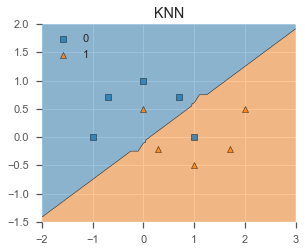

In [190]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10, random_state=0)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['KNN']
for clf, lab, grd in zip([knn],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    knn_clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=knn_clf, legend=2)
    plt.title(lab)

plt.show()

> With ten samples, KNN appears to effectively categorize all but two in their proper class.
* That is an improvement of greater than 25\% percent over our original KNN model.
* How will it perform with 10 - times that amount.

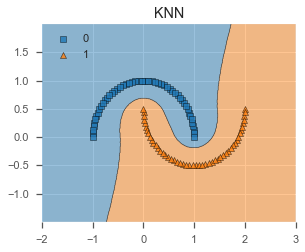

In [191]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=0)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['KNN']
for clf, lab, grd in zip([knn],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    knn_clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=knn_clf, legend=2)
    plt.title(lab)

plt.show()

> That is impressive.
* All samples are properly categorized, with what appears to be a fairly generous boundary.

### Bootstrap Aggregation (Bagging)

> Next, we will try a bagged trees ensemble model. 
* This model can help reduce variance that may be present in a simple Decision Tree model.
* Considering the closely matched results of our original model's training and test sets, we are not likely to be surprised by the bagging scores.

In [18]:
# instantiating a Bagging classifier
bagged_tree_clf = BaggingClassifier(
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=5,
        random_state=0
    ),
    n_estimators=20,
    random_state=0
)

In [19]:
# fit to the training data
bagged_tree_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
                                                        splitter='best'),
          

In [20]:
# checking the accuracy of our Training set
print("\nTraining set score: ", 
      bagged_tree_clf.score(X_train, 
                        y_train).round(2))

# checking the accuracy of our Test set
print("Test set score:     ", 
      bagged_tree_clf.score(X_test, 
                        y_test).round(2))


Training set score:  0.66
Test set score:      0.64


> True enough, our bagging scores are in line with scores from our original Tree model.
* Note: when tested with a max depth of 7, the model scores the training set at 0.69 and the test set at 0.65, indicating that the model quicky begins to overfit as we increase depth.

### Random Forest

> Our next ensemble model is Random Forest. 
* This model allows for lower correlation among samples, by limiting the number of features on which to split.
* We will see how its scores compares with our previous models.

In [21]:
# instantiating a Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=5, 
                                random_state = 0)

# fit to training data
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
# checking the Training accuracy of our forest
print("\nTraining set score: ", forest_clf.score(X_train, y_train).round(2))

# checking the Test accuracy of our forest
print("Test set score:     ", forest_clf.score(X_test, y_test).round(2))


Training set score:  0.66
Test set score:      0.65


> Our test score nuged upwards, a tiny bit.
* So far, results have not strayed far from our our first - guess tree. 
* We can see if Random Forest indicates a change in feature importances, from our original Decision Tree model.

#### Forest Feature Importance

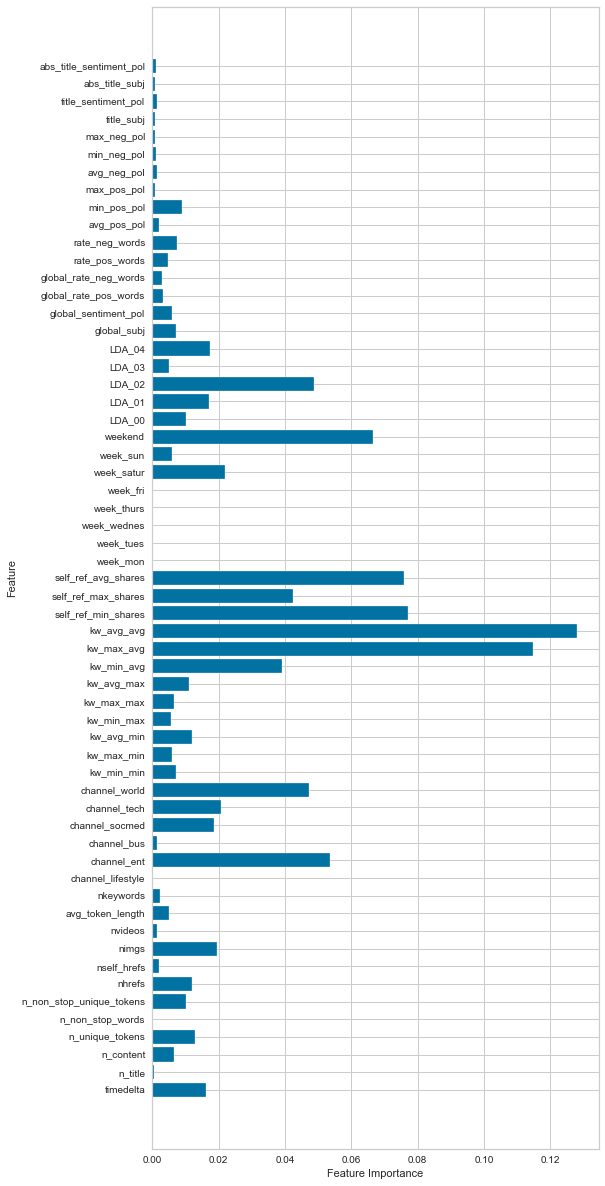

In [23]:
plot_feature_importances(forest_clf)

> While scores have remained close among our models, we can observe from the plot above that feature importances have shifted.
* The random forest classifier suggests about 10 relatively important features--a couple more than suggested by the Decision Tree model.
* Where `kw_avg_avg` reached 0.33 and `kw_avg_max` eeked - out only 0.02, in our Tree model, the Random Forest model improtances for the same two features are approximately 0.11 and 0.13, respectively.

Even if accuracy scores were exactly the same, the more balanced RandomForest model would be preferred to the lucky - guess of our original Decision Tree model.

## Forward Selection

> So far, we have been modeling with all features in the dataframe.
* Including irrelevant features can introduce 'noise' to our model and make results less interpretable.
* We can make use of the `mlxtend` library's `SequentialFeatureSelector` module to perform forward selection and determine the best features to retain for modeling.

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [25]:
# Build step forward feature selection
sfs1 = sfs(forest_clf,
           n_jobs=5,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   28.6s
[Parallel(n_jobs=5)]: Done  59 out of  59 | elapsed:   59.4s finished

[2020-03-21 17:09:11] Features: 1/10 -- score: 0.5934488655961978[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   46.0s
[Parallel(n_jobs=5)]: Done  58 out of  58 | elapsed:  1.3min finished

[2020-03-21 17:10:31] Features: 2/10 -- score: 0.6138637301206918[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   38.7s
[Parallel(n_jobs=5)]: Done  57 out of  57 | elapsed:  1.1min finished

[2020-03-21 17:11:40] Features: 3/10 -- score: 0.6244913896695834[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   50.2s
[Parallel(n_jobs=5)]: Done  56 out of  56 | elap

> So:
* The score for selected features only is comparable.
* We can use our selected featues to create a new `X` for training and testing.
* This will provide us with a much simpler set of relevant variables for modeling.

In [27]:
# Viewing column indexes of the selected predictors
feat_cols = list(sfs1.k_feature_idx_) # instantiate as a list
print(feat_cols)

# saving the column indexes as a pickle file
with open('data/feat-cols.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(feat_cols, f, pickle.HIGHEST_PROTOCOL)

# viewing `feat_cols` names, transposed as a series
df_2.iloc[:, feat_cols].head(0).T

[0, 3, 13, 15, 16, 17, 22, 26, 29, 37]


url
timedelta
n_unique_tokens
channel_ent
channel_socmed
channel_tech
channel_world
kw_max_max
kw_avg_avg
self_ref_avg_shares
weekend


In [28]:
# creating a new set of train - test features
# our target `y` remains the same
X_feat = df_2.iloc[:, feat_cols]

X_feat.head(0)

,timedelta,n_unique_tokens,channel_ent,channel_socmed,channel_tech,channel_world,kw_max_max,kw_avg_avg,self_ref_avg_shares,weekend
url,,,,,,,,,,


In [34]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.61%


## GridSearch

> It would be time - consuming to perform exhaustive, manual hyper - perameter tuning, even on a reduced set of features. 
* Instead, we can create a parameter grid dictionary listing a range of parameter values we wish to tune for optimization of our Random Forest model.
* Values including the number of estimators to use, the criterion, maximum depth, minimum samples to split, and minimum samples per leaf.

In [29]:
# creating a parameter grid dictionary
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

We use Scikit-Learn's GridSearchCV module to determine an optimal parameter combination from among the values in our grid dictionary.

In [30]:
# performing a grid search with Random Forest
rf_grid_search = GridSearchCV(forest_clf, 
                              rf_param_grid, 
                              cv=3)
rf_grid_search.fit(X_train, y_train)
print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 66.69%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


> GridSearch determined that our model could achieve its most accurate score, by changing `max_depth` from 5 to 'None'.
    * Optimal criterion was changed from 'gini' to 'entropy', and `n_estimators` were kept at the original setting of 100.
    * The grid search increased `min_samples_leaf` from 1 to 6, and `min_samples_split` was found to be more effective at 5, rather than our original value of 1.

### Other Algorithms

In addition to the models we have tested, Boosting models (including __AdaBoost__, __Gradient Boost__, and __XGBoost__) offer additional tuning options.

In [192]:
# list models from the current notebook
notebook_models = [tree_clf, 
                  bagged_tree_clf,
                  forest_clf,
                  rf_grid_search]

In [199]:
from yellowbrick.features import manifold_embedding

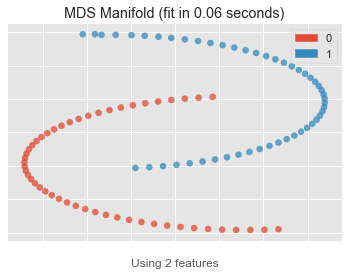

In [200]:
visualizer = manifold_embedding(X, y)

In [193]:
from yellowbrick.classifier import ClassificationReport

# =======P====I======P=====E====L=====I====N====E==

In [ ]:
# importing module
from sklearn.pipeline import Pipeline


# splitting data
X = X_feat
y =

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# scaling data
# Instantiate StandardScaler
scaler = StandardScaler()

# Transforming the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Converting into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
display(scaled_df_train.head())


# classifying 


# instantiating a list of tuples (name and regressor)
pipeline = Pipeline(steps=[
    ('tree_clf', DecisionTreeClassifier(criterion='gini', 
                                  max_depth=5, 
                                  random_state = 0)),
    ('knn_clf', KNeighborsClassifier()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression()),
    ('clf', LogisticRegression())
])

# viewing test set predictions
for clf in pipeline:
    pred = clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train, y_train)


y_preds=pipeline.predict(X_test)



accuracy_score(y_test, y_preds)

In [ ]:
# Initializing Classifiers
# clf1 = bagged_tree_clf
# clf2 = forest_clf
# clf3 = SVC(random_state=0, probability=True)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Plotting Decision Regions
# gs = gridspec.GridSpec(2, 2)
# fig = plt.figure(figsize=(10, 8))

# for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
#                          ['Bag of Trees', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
#                          itertools.product([0, 1], repeat=2)):
#     clf.fit(X, y)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X_feat.values, y.astype(np.integer).values, clf=clf, legend=2)
#     plt.title(lab)
# plt.show()

## Save and Continue

We can create a pipeline that will enable us to plug - in various models. By creating a scaled pipeline we can also, easily incorporate and compare additional models such as __K-Nearest Neighbors__(KNN).

We will tackle that in the next notebook. First, we will use a set of custom functions to save the models we have created so far.

In [ ]:
# importing custom helper functions
from helpers.helper import *

In [ ]:
# def save_model(model, directory='./models'):
#     """
#     creates a file name by appending .pickle' to a model's variable name,
#     and saves the model as a pickle file in the working directory's
#     'model' subdirectory
#     """
#     # verify or create the save - path directory
#     if not os.path.exists(directory):
#         os.mkdir(directory)

#     # build the file name
#     filename = [tuple[0] for tuple in filter(
#         lambda x: model is x[1],
#         globals().items())
#              ][0]


#     # pickle the model with the created filename
#     with open(f'{directory}/{filename}.pickle', 'wb') as f:
#         # pickling the dataframe using the highest protocol available
#         pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#     return print(f'Saved {filename} to {directory} as pickle file: {filename}\n', '-'*50)


# def save_models(models):
#     """
#     passes a list of model names and saves
#     the models as separate pickle files
#     """
#     for m in models:
#         saved_model = save_model(m)
#     return saved_model


### Serialize Models

In [ ]:
m1_clf = "I'm a model, babe."
m2_clf = "I'm a model, too, babe."
m3_clf = "I'm a model, three, babe."

test_models = [m1_clf, m2_clf, m3_clf ]

def model_name(model):
    """
    returns a model variable as a string
    """
    return [tuple[0] for tuple in filter(
        lambda x: model is x[1],
        globals().items())
             ][0]

# showing a model
print( m1_clf )

# showing a variable name as a string
print( "-"*72, "\n", model_name(m1_clf), "\n", "-"*72 )

# showing the list
print( test_models )

# showing the variable name as a string
print( "-"*72, "\n", model_name(test_models) )

In [ ]:
def save_model(model, directory='./mods'):
    """
    creates a file name by appending .pickle' to a model's variable name,
    and saves the model as a pickle file in the working directory's
    'model' subdirectory
    """
    # build the file name
    f_name = [tuple[0] for tuple in filter(
        lambda x: model is x[1],
        globals().items())
             ][0]

    # replace undersocres with dashes, before pickling
    f_name = f_name.replace('_', '-')
    
    # verify or create the save - path directory
    if not os.path.exists(directory):
        os.mkdir(directory)

    # pickle the model with the created filename
    with open(f'{directory}\/{f_name}.pickle', 'wb') as f:
        # pickling the dataframe using the highest protocol available
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    return print(f'Saved to {directory} as pickle file: {f_name}\n', '-'*50)

# saving a single model to the `mods` folder
save_model(m1_clf)

In [ ]:
def save_models(models):
    """
    passes a list of model names and saves
    the models as separate pickle files
    """
    for m in models:
        saved_model = save_model(m)
    return saved_model

# using the `test_models` list to save all 
# models to the `mods` folder
save_models(test_models)

In [ ]:
# getting names of files in `mods' folder
# that have the .pickle extension
for name in glob.glob('mods/*.pickle'):
    print(os.path.basename(name))

In [ ]:
import os
import glob
import pickle

def show_files(relative_path='mods/', extension='*.pickle'):
    """ printing names of files in `relative_path' folder
    of a particular extension; arguments entered as strings
    """
    for name in glob.glob(relative_path):
        print(os.path.basename(relative_path , extension))
    return None

show_pickles('mods/*.pickle')

### Un - serialize Model(s) from Pickle(s)

In [ ]:
# opening saved data from pickle file(s) in `mods` folder
# The protocol version used is detected automatically, so we do not
# have to specify it.

f_name=None

def un_pickle_from_mods(files_list):
    path = 'mods/*.pickle'
    for tpl in glob.glob(path):
        if name[1] in files_list:
            print('name[1] is in the file list\n')
            f_name = os.path.splitext(
                os.path.basename(
                    name[1]
                )
            )[0
              ].replace('-', '_')  # replace dashes with undersocres
            print("f_name assigned \n")
            with open(name, 'rb') as f:
                f_name = pickle.load(f)
            print(f"{f_name} opened\n")
    return f_name


In [ ]:
# opening saved data from pickle file(s) in `mods` folder
# The protocol version used is detected automatically, so we do not
# have to specify it.

f_name=None

def un_pickle_from_mods_2(files_path):
    for item in files_path:
        #path = './mods/*.pickle'
        for tpl in glob.glob('./mods/*.pickle'):
            if item in tpl:
                print(os.path.normpath(tpl))
                # printing filename with extension
                print(os.path.basename(tpl))
                # instantiating variable for filename without extension
                f_name = os.path.splitext(os.path.basename(tpl))[0]
                print(f'{f_name} is in the file list\n')
                # instantiate variable name, replacing dashes with undersocres
                f_name = f_name.replace('-', '_')
                print(f_name, "is in memory")
                print("-"*72, "\n")
                with open(os.path.relpath(tpl), 'rb') as f:
                    f_name = pickle.load(f)
                print(f"{f_name} opened\n")
    return f_name

In [ ]:
print(glob.glob('mods/*.pickle'))

In [ ]:
# ADD TO FUNCTION
for tpl in glob.glob('mods/*.pickle'):
    r_path = os.path.relpath(tpl)
    print(r_path)
    
    # instantiating variable for filename  with extension
    b_name = os.path.basename(tpl)
    print(b_name)
    
    # instantiating variable for filename without extension
    f_name = os.path.splitext(b_name)[0]
    print(f'{f_name} is in the file list\n')
    
    # instantiate variable name, replacing dashes with undersocres
    f_name = f_name.replace('-', '_')
    print(f_name, "is in memory")
    print("-"*72, "\n")
    
    with open(os.path.relpath(tpl), 'rb') as f:
        f_name = pickle.load(f)
        print(f"{f_name} opened\n")

In [ ]:
un_pickle_from_mods(['m3-clf.pickle'])

In [ ]:
test_models

In [ ]:
*************
os.path.splitext(os.path.basename(tpl[1]))[0]
f_name = os.path.split(name)[1].replace('-', '_')

# File path example.
path = "/some/file.with spaces.dot.docx"

# Get the filename only from the initial file path.
filename = os.path.basename(path)

# Use splitext() to get filename and extension separately.
(file, ext) = os.path.splitext(filename)

In [ ]:
# pass model list to the custom `save_models` function
save_models(notebook_models)

## Notebook Summary
> -
* -
* -
* -
    * -
* -


### Save Data

In [ ]:
# 72 Char. screen - width reference
########################################################################

In [ ]:
with open('data/#.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
def pickle_model(model):
    
    with open('data/#.pickle', 'wb') as f:
        # pickling the dataframe using the highest protocol available
        pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)